In [8]:
%matplotlib inline

import sys
sys.path.append("..") # This allows for importing from other directories above
# Our imports
from models.adaboost_mh import AdaBoostMH
from models.weak_learner import stump_base as weak_clf
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt


# Load the data
switch = 5
if switch == 0:
    X_train = np.load('../data/pendigits/train_data.npy')
    y_train = np.load('../data/pendigits/train_labels.npy')
    X_test = np.load('../data/pendigits/test_data.npy')
    y_test = np.load('../data/pendigits/test_labels.npy')
    k = 10
elif switch == 1:
    X_train = np.load('../data/synth/single/ten/train_data.npy')
    y_train = np.load('../data/synth/single/ten/train_labels.npy')
    X_test = np.load('../data/synth/single/ten/test_data.npy')
    y_test = np.load('../data/synth/single/ten/test_labels.npy')
    k = 10
elif switch == 2: # pseudo = 1
    X_train = np.load('../data/synth/two/train_data.npy')
    y_train = np.load('../data/synth/two/train_labels.npy')
    X_test = np.load('../data/synth/two/test_data.npy')
    y_test = np.load('../data/synth/two/test_labels.npy')
    k = 2
elif switch == 3:
    X_train = np.load('../data/synth/single/three/train_data.npy')
    y_train = np.load('../data/synth/single/three/train_labels.npy')
    X_test = np.load('../data/synth/single/three/test_data.npy')
    y_test = np.load('../data/synth/single/three/test_labels.npy')
    k = 3
elif switch == 4:
    X_train = np.load('../data/synth/single/four/train_data.npy')
    y_train = np.load('../data/synth/single/four/train_labels.npy')
    X_test = np.load('../data/synth/single/four/test_data.npy')
    y_test = np.load('../data/synth/single/four/test_labels.npy')
    k = 4
elif switch == 5:
    X_train = np.load('../data/synth/single/half/train_data.npy')
    y_train = np.load('../data/synth/single/half/train_labels.npy')
    X_test = np.load('../data/synth/single/half/test_data.npy')
    y_test = np.load('../data/synth/single/half/test_labels.npy')
    k = 2
elif switch == 6:
    X_train = np.load('../data/synth/multi/incr/train_data.npy')
    y_train = np.load('../data/synth/multi/incr/train_labels.npy')
    X_test = np.load('../data/synth/multi/incr/test_data.npy')
    y_test = np.load('../data/synth/multi/incr/test_labels.npy')
    k = 4
else:
    X_train = np.load('../data/synth/multi/alt/train_data.npy')
    y_train = np.load('../data/synth/multi/alt/train_labels.npy')
    X_test = np.load('../data/synth/multi/alt/test_data.npy')
    y_test = np.load('../data/synth/multi/alt/test_labels.npy')
    k = 4
    
#y_train = y_train[0:15]
#X_train = X_train[0:15]

#y_train = np.concatenate((y_train, y_train), axis=0)
#y_train = np.concatenate((y_train, y_train), axis=0)
#y_train = np.concatenate((y_train, y_train), axis=0)
#y_train = np.concatenate((y_train, y_train), axis=0)
#n = y_train.shape[0]
#print(n)
#X_train = np.atleast_2d(np.array(list(range(0,n)))).T


# Initialize model 
model = AdaBoostMH(X_train, y_train, X_test, y_test, k, 0.5)

In [9]:
T = 1000
verbose = 0

In [13]:
err_tr, err_te, gams, v_ts, d_ts = model.run_factorized(T, weak_clf, 'unif', verbose)

../models/weak_learner.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = 0.5 * np.log((eps_pls) / (eps_min))
../models/adaboost_mh.py:270: RuntimeWarning: invalid value encountered in true_divide
  D_t /= np.sum(D_t)


UnboundLocalError: local variable 'alpha_best' referenced before assignment

## Plot Pseudo Weights

In [11]:
def calc_pseudo_ws(Wts, vts, Y, T):
    w_pseudo_ts = []
    for t in range(T):
        #W_t = Wts[t + 1] # skip W_0
        W_t = Wts[t]
        v_t = vts[t]
        # Get all the y_i,l * v_l in one matrix
        Y_mult_v_t = np.multiply(Y, v_t)
        # The above is either 1 or -1, to get an indicator
        # about whether their product is +1 or -1 you can 
        # add one to the whole matrix and all the -1 -> 0,
        # or add negative one to the whole matrix and all
        # the +1 -> 0. You just need to normalize by \pm 1/2,
        # to get an indicator or a matrix mask.
        w_p_mask = ((Y_mult_v_t + 1) * 0.5).astype('int')
        w_n_mask = ((Y_mult_v_t - 1) * -0.5).astype('int')
        w_p_t = np.sum(np.multiply(W_t, w_p_mask), axis=1)
        w_n_t = np.sum(np.multiply(W_t, w_n_mask), axis=1)
        w_pseudo_t = np.sum(np.abs(w_p_t - w_n_t))
        w_pseudo_ts.append(w_pseudo_t)
    return w_pseudo_ts

In [12]:
pseudo_W_ts = calc_pseudo_ws(d_ts, v_ts, y_train, T)

ValueError: operands could not be broadcast together with shapes (10,2) (4,) 

In [6]:
# Function for plotting Pseudo weights on same plot for two datasets
def make_plot(data_to_plot, T, ylabel, xlabel, title):
    ts = np.linspace(1, T, num=T)
    plt.plot(ts, data_to_plot) #, label='Pseudo Weights')
    #plt.legend(loc='best')
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.xlabel(xlabel, fontsize=22)
    plt.ylabel(ylabel, rotation=0, fontsize=22, labelpad=20)
    plt.title(title, fontsize=22)
    axes = plt.gca()
    axes.set_ylim([0,1.1])

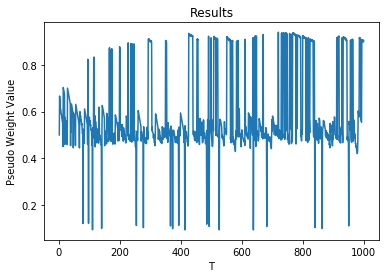

In [7]:
make_plot(pseudo_W_ts, T, r"$w'_\Sigma$", "Number of Iterations", r"$w'_\Sigma$ on Pendigits Dataset")

In [10]:
np.min(pseudo_W_ts)

0.32206563234823093

In [11]:
np.argmin(pseudo_W_ts)

3

In [12]:
pseudo_W_ts[0]

0.8

## Plot Gammas

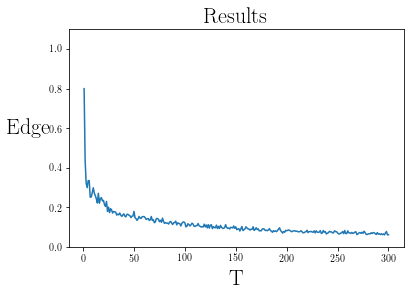

In [13]:
make_plot(gams, T, "Edge", "T", "Results")

In [14]:
np.min(gams)

0.060188779842337455